### Homework-01

Supanat Jintawatsakoon<br>supanat.jtk@g.swu.ac.th

### 2. Data Wrangling and Pre-processing

2.1 ทําการอิมพอร์ตเพ็กเก็จและกําหนดค่าต่างๆที่จําเป็น

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm
from collections import OrderedDict
from scipy.stats import zscore
%matplotlib inline

In [2]:
cmaps = OrderedDict()

2.2 เปลี่ยนไดเร็กทอรี่ไปที่ไดเร็กทอรี่ที่มีไฟล์ชุดข้อมูลอยู่และทําการอ่านไฟล์ชุดข้อมูลไปเก็บไว้ในตัวแปรชื่อ df

In [3]:
path = os.getcwd()
path += "/dataset/"
fileName = "hw01_burger_king_nutrition_fact_sheet.csv";
fullPath = path+fileName
fullPath

'/Users/supanat/Dev/DS/IT525/Projects/it525_2_2017_hw01/dataset/hw01_burger_king_nutrition_fact_sheet.csv'

In [4]:
df = pd.read_csv(fullPath)
df.head()

,Nutrition facts,serving size (g),Calories,Calories from fat,Total fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
0,WHOPPER® Sandwiches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WHOPPER® Sandwich,270,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49,2.0,11.0,28.0
2,w/o Mayo,249,500.0,200.0,22.0,9.0,1.5,80.0,840.0,49,2.0,11.0,28.0
3,WHOPPER® Sandwich with Cheese,292,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50,2.0,11.0,32.0
4,w/o Mayo,271,580.0,260.0,29.0,13.0,1.5,105.0,1200.0,50,2.0,11.0,32.0


2.3 แสดงจํานวนแถวและจํานวนคอลัมน์ของชุดข้อมูล

In [5]:
rowsCount = df.shape[0]
columsCount = df.shape[1]
print ("rows x colums")
print(df.shape)
print("rows count : ", rowsCount)
print("columns count : ", columsCount)

rows x colums
(210, 13)
rows count :  210
columns count :  13


2.4 แสดงรายชื่อคอลัมน์ที่มีอยู่ในชุดข้อมูล

In [6]:
df.columns

Index(['Nutrition facts', ' serving size (g)', ' Calories',
       ' Calories from fat', ' Total fat (g)', ' Saturated Fat (g)',
       ' Trans Fat (g)', ' Chol (mg)', ' Sodium (mg)', ' Total Carb (g)',
       ' Dietary Fiber (g)', ' Total Sugar (g)', ' Protein (g)'],
      dtype='object')

2.5 ทําการลบช่องว่างที่อยู่หน้าชื่อคอลัมน์ออก เพื่อว่าเวลาอ้างถึงชื่อคอลัมน์จะได้ใช้ชื่อตรงๆได้เลยไม่ต้องพิมพ์ช่องว่าง

In [7]:
df.columns = map(lambda x: x.strip(), df.columns.values)

In [8]:
df.columns

Index(['Nutrition facts', 'serving size (g)', 'Calories', 'Calories from fat',
       'Total fat (g)', 'Saturated Fat (g)', 'Trans Fat (g)', 'Chol (mg)',
       'Sodium (mg)', 'Total Carb (g)', 'Dietary Fiber (g)', 'Total Sugar (g)',
       'Protein (g)'],
      dtype='object')

2.6 นับจํานวนอาหารในชนิด burger, sandwich, salad, และ beverage พร้อมทั้งแสดงภาพโดยใช้ bar graph และ pie chart

- นับจํานวนอาหารที่มีอยู่ในแต่ละชนิดที่เป็นburger,sandwich,salad,และbeverage

In [9]:
mydict = dict()
mydict['burger'] = len(df[df['Nutrition facts'].str.contains('burger|Burger')])
mydict['sandwich'] = len(df[df['Nutrition facts'].str.contains('Sandwich|Sandwiches')])
mydict['salad'] = len(df[df['Nutrition facts'].str.contains('Salad|salad')])
mydict['beverage'] = len(df[df['Nutrition facts'].str.contains('Milk|Juice|Shake|Smoothie|Tea|Lemonade|Coke|Coca Cola|Orange|Punch|Sprite|Beer|Pepper')])

In [10]:
mydict.keys

<function dict.keys>

- สร้าง bar graph และ pie chart เพื่อแสดงสัดส่วนจํานวนอาหารที่มีอยู่ในแต่ละชนิด โดยให้กราฟทั้ง สองอยู่ใน figure เดียวกัน แต่คนละ subplots

In [11]:
mydict.values()

dict_values([13, 14, 6, 26])

In [12]:
cmaps['Set1'] = ['Pink', 'yellowgreen', 'lightskyblue', 'Gold',]

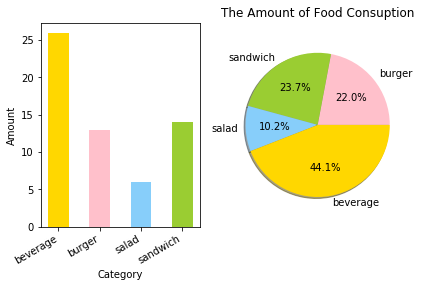

In [13]:

fig,axPlots = plt.subplots(1,2)
axPlots[0].bar(mydict.keys(), mydict.values(), width=0.5, align='center', color=cmaps['Set1']) 
axPlots[0].set_xlabel('Category')
axPlots[0].set_ylabel('Amount')
#axPlots[0].set_aspect(1)
axPlots[1].pie(mydict.values(), labels=mydict.keys(), autopct='%1.1f%%', startangle=0, shadow=True, colors=cmaps['Set1']) 
#axPlots[1].legend( loc="lower left",fontsize=6)
#axPlots[1].set_aspect(1)
plt.axis('equal')
plt.title('The Amount of Food Consuption')
#plt.subplots_adjust(left=0.0, bottom=0.5, right=0.45)
fig.tight_layout()
fig.autofmt_xdate()


2.7 ทําการแทนค่าข้อมูลใน cell ที่มีแต่ช่องว่าง (whitespace) อย่างเดียวด้วย NaN —เนื่องจากข้อมูลในชุดข้อมูลอาจมี ข้อมูลที่เป็นช่องว่าง (whitespace) อย่างเดียว อยู่ โดยอาจจะเป็นความตั้งใจหรือความผิดพลาดของการป้อนข้อมูล หรือสร้างชุดข้อมูลขึ้นมา ซึ่งทําให้โปรแกรมคิดว่ามันเป็นข้อมูลชนิดหนึ่ง ไม่ใช้ข้อมูลที่ขาดหาย (missing value)

In [14]:
len(df[df.isnull().any(axis=1)])

28

In [15]:
# คอลัมน์ที่มี ช่องว่าง
df.isnull().any(axis=0)

Nutrition facts      False
serving size (g)      True
Calories              True
Calories from fat     True
Total fat (g)         True
Saturated Fat (g)     True
Trans Fat (g)         True
Chol (mg)             True
Sodium (mg)           True
Total Carb (g)        True
Dietary Fiber (g)     True
Total Sugar (g)       True
Protein (g)           True
dtype: bool

In [16]:
# แถวที่มี ช่องว่าง
df.isnull().any(axis=1)

0       True
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12      True
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24      True
25     False
26     False
27      True
28     False
29     False
       ...  
180    False
181    False
182    False
183    False
184     True
185    False
186    False
187    False
188    False
189     True
190    False
191    False
192    False
193     True
194    False
195    False
196    False
197    False
198    False
199     True
200    False
201    False
202    False
203    False
204     True
205    False
206    False
207    False
208    False
209    False
Length: 210, dtype: bool

- แทนค่าข้อมูลที่เป็นช่องว่างอย่างเดียวด้วยNaNเช่นในไฟลNcsvแทนที่,'',ด้วย,NaN,

In [17]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [18]:
len(df[df.isnull().any(axis=1)])

94

2.8 ลบแถวข้อมูลที่มีค่าNaNอยู่ไม่ว่าจะมีแค่คอลัมน์เดียวหรือทุกคอลัมน์ในแถวข้อมูลนั้นๆ

- แสดงลิสต์ของ row indices ที่มีค่า NaN

In [19]:
r_index = df[df.isnull().any(axis=1)].index.tolist()
#r_index

- แสดงจํานวนแถวข้อมูลที่มีค่า NaN อยู่ ซึ่งควรมี 94 แถว

In [20]:
len(r_index)

94

- ทําการลบแถวข้อมูลที่มีค่าNaNอยู่

In [21]:
df.drop(r_index,inplace=True)

- ตรวจสอบจํานวนแถวของชุดข้อมูลหลังจากลบแถวที่มีค่า NaN ออกแล้ว ซึ่งควรเท่ากับ 210 − 94 = 116

In [22]:
rowsCount = df.shape[0]
print("rows count : ", rowsCount)

rows count :  116


2.9 ตรวจสอบชนิดของข้อมูลในแต่ละคอลัมน์ ใน Pandas DataFrame

In [23]:
df.dtypes

Nutrition facts       object
serving size (g)      object
Calories             float64
Calories from fat    float64
Total fat (g)        float64
Saturated Fat (g)    float64
Trans Fat (g)        float64
Chol (mg)            float64
Sodium (mg)          float64
Total Carb (g)        object
Dietary Fiber (g)    float64
Total Sugar (g)      float64
Protein (g)          float64
dtype: object

- แปลงข้อมูลในคอลัมน์ serving size (g) และ Total Carb (g) จากชนิด object ไปเป็น float64

In [24]:
df['serving size (g)'] = df['serving size (g)'].astype(np.float64)
df['Total Carb (g)'] = df['Total Carb (g)'].astype(np.float64)

In [25]:
df.dtypes

Nutrition facts       object
serving size (g)     float64
Calories             float64
Calories from fat    float64
Total fat (g)        float64
Saturated Fat (g)    float64
Trans Fat (g)        float64
Chol (mg)            float64
Sodium (mg)          float64
Total Carb (g)       float64
Dietary Fiber (g)    float64
Total Sugar (g)      float64
Protein (g)          float64
dtype: object

2.10 แสดงค่าสถิติเชิงพรรณาสําหรับข้อมูลใน DataFrame

In [26]:
df.describe()

,serving size (g),Calories,Calories from fat,Total fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,155.017241,394.137931,197.672414,21.935345,6.939655,0.379310,66.379310,764.655172,34.387931,1.879310,8.870690,15.224138
std,100.782071,243.742804,148.045867,16.483395,5.962986,0.762207,80.202424,555.232706,18.859098,1.784743,8.828344,13.954638
min,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,87.000000,227.500000,100.000000,11.000000,2.875000,0.000000,10.000000,260.000000,26.000000,1.000000,2.000000,4.000000
50%,135.000000,335.000000,155.000000,17.000000,5.000000,0.000000,32.500000,720.000000,31.000000,1.000000,7.000000,12.000000
75%,214.500000,510.000000,270.000000,30.000000,9.000000,0.500000,101.250000,1080.000000,48.000000,2.000000,11.000000,23.250000
max,464.000000,1190.000000,710.000000,79.000000,31.000000,3.500000,375.000000,2460.000000,123.000000,9.000000,41.000000,61.000000


2.11 วาด scatter plot แสดงความสัมพันธ์ระหว่างจํานวน serving size (g) และ Calories

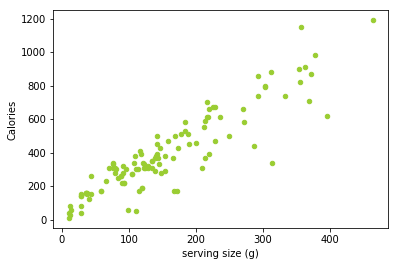

In [27]:
df.plot.scatter(x='serving size (g)', y='Calories',color='YellowGreen',s=20);

2.12 แปลงค่าปริมาณสารอาหาร ให้อยู่ในอัตราส่วนของ serving size (g) ที่เท่ากัน —เนื่องจากปริมาณสารอาหารใน
อาหารแต่ละชนิด มาจากปริมาณ serving size (g) ที่ต่างกัน ดังนั้น เราควรจะแปลงค่ามันให้เทียบมาจาก ปริมาณ serving size (g) ที่เท่าๆกัน โดยมีหลักคิดคือ —ถ้า ปริมาณ serving size = s, มีปริมาณสารอาหารในคอลัมน์ B = b ดังนั้น ที่ปริมาณ serving size = max_s จะมีปริมาณสารอาหารในคอลัมน์ B = b ∗ max_s/s

In [28]:
df['serving size (g)'].nlargest(5)

83    464.0
63    395.0
9     377.0
84    371.0
64    369.0
Name: serving size (g), dtype: float64

- หาปริมาณ serving size (g) ที่สูงที่สุดในชุดข้อมูล และเก็บไว้ในตัวแปรชื่อ max_ss

In [29]:
max_ss = max(df['serving size (g)'])
print("MAX Serving Size : ",max_ss)

MAX Serving Size :  464.0


- แปลงค่าปริมาณสารอาหารในคอลัมน์ต่างๆ โดยเทียบกับ serving size (g) ที่สูงที่สุด

In [30]:
df

,Nutrition facts,serving size (g),Calories,Calories from fat,Total fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
1,WHOPPER® Sandwich,270.0,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49.0,2.0,11.0,28.0
2,w/o Mayo,249.0,500.0,200.0,22.0,9.0,1.5,80.0,840.0,49.0,2.0,11.0,28.0
3,WHOPPER® Sandwich with Cheese,292.0,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50.0,2.0,11.0,32.0
4,w/o Mayo,271.0,580.0,260.0,29.0,13.0,1.5,105.0,1200.0,50.0,2.0,11.0,32.0
5,Bacon & Cheese WHOPPER® Sandwich,303.0,790.0,460.0,51.0,17.0,2.0,125.0,1560.0,50.0,2.0,11.0,35.0
6,BBQ Bacon WHOPPER® Sandwich,303.0,800.0,460.0,51.0,17.0,2.0,125.0,1540.0,53.0,2.0,14.0,35.0
7,DOUBLE WHOPPER® Sandwich,354.0,900.0,520.0,58.0,20.0,3.0,175.0,1050.0,49.0,2.0,11.0,48.0
8,w/o Mayo,333.0,740.0,360.0,40.0,17.0,2.5,165.0,910.0,49.0,2.0,11.0,47.0
9,DOUBLE WHOPPER® Sandwich with Cheese,377.0,980.0,580.0,64.0,24.0,3.0,195.0,1410.0,50.0,2.0,11.0,52.0
10,w/o Mayo,355.0,820.0,420.0,47.0,21.0,3.0,185.0,1270.0,50.0,2.0,11.0,52.0


In [31]:
orig_serving_size = df['serving size (g)'].copy()
df[df.select_dtypes(include=['float64']).columns] = df[df.select_dtypes(include=['float64']).columns]*max_ss
df[df.select_dtypes(include=['float64']).columns].div(orig_serving_size.values, axis='rows')

,serving size (g),Calories,Calories from fat,Total fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
1,464.0,1134.222222,618.666667,68.740741,20.622222,2.577778,154.666667,1684.148148,84.207407,3.437037,18.903704,48.118519
2,464.0,931.726908,372.690763,40.995984,16.771084,2.795181,149.076305,1565.301205,91.309237,3.726908,20.497992,52.176707
3,464.0,1175.890411,667.397260,73.095890,25.424658,3.178082,182.739726,2129.315068,79.452055,3.178082,17.479452,50.849315
4,464.0,993.062731,445.166052,49.653137,22.258303,2.568266,179.778598,2054.612546,85.608856,3.424354,18.833948,54.789668
5,464.0,1209.768977,704.422442,78.099010,26.033003,3.062706,191.419142,2388.910891,76.567657,3.062706,16.844884,53.597360
6,464.0,1225.082508,704.422442,78.099010,26.033003,3.062706,191.419142,2358.283828,81.161716,3.062706,21.438944,53.597360
7,464.0,1179.661017,681.581921,76.022599,26.214689,3.932203,229.378531,1376.271186,64.225989,2.621469,14.418079,62.915254
8,464.0,1031.111111,501.621622,55.735736,23.687688,3.483483,229.909910,1267.987988,68.276276,2.786787,15.327327,65.489489
9,464.0,1206.153846,713.846154,78.769231,29.538462,3.692308,240.000000,1735.384615,61.538462,2.461538,13.538462,64.000000
10,464.0,1071.774648,548.957746,61.430986,27.447887,3.921127,241.802817,1659.943662,65.352113,2.614085,14.377465,67.966197


2.13 ตรวจดูว่าาข้อมูลมีค่าที่ต่ำหรือสูงผิดปกติ (outliers) หรือไม่

วาด boxplot สําหรับข้อมูลทุกคอลัมน์ ยกเว้นคอลัมน์แรกที่ไม่ใช่ข้อมูลตัวเลข โดยให้ boxplots ทุกอันอยู่ใน figure และ plot เดียวกัน 

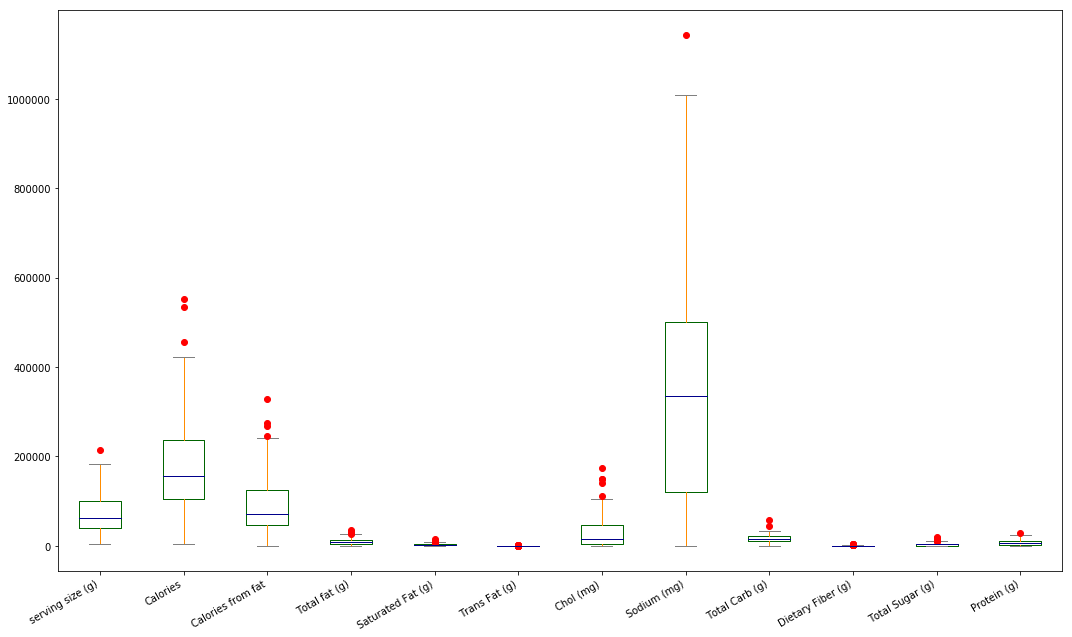

In [32]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
fig, ax = plt.subplots()
df.plot.box(color=color,ax=ax,figsize=(15, 10),sym='ro')
fig.tight_layout()
fig.autofmt_xdate()

<b>หมายเหตุ:</b> data points ที่อยู่นอก boxplot จะถูกพิจารณาว่าเป็น outliers

- แปลงค่าข้อมูลไปเป็นค่า Z หรือ ค่ามาตรฐาน (standard value) เพื่อดูว่ามีค่าใดบ้างที่ต่ำกว่า -3 หรือสูงกว่า
3 หรือไม่

In [33]:
df_zscore = df[df.columns[1:]].apply(zscore)
df_zscore.head()

,serving size (g),Calories,Calories from fat,Total fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
1,1.145855,1.095480,1.101225,1.100685,0.852308,1.476701,0.295791,0.389529,0.778164,0.067916,0.242237,0.919500
2,0.936580,0.436203,0.015790,0.003939,0.347021,1.476701,0.170566,0.136288,0.778164,0.067916,0.242237,0.919500
3,1.365094,1.425119,1.508263,1.466267,1.526023,2.135536,0.608855,1.040718,0.831418,0.067916,0.242237,1.207387
4,1.155820,0.765842,0.422828,0.430452,1.020737,1.476701,0.483629,0.787478,0.831418,0.067916,0.242237,1.207387
5,1.474714,1.631143,1.779622,1.770919,1.694452,2.135536,0.734080,1.438668,0.831418,0.067916,0.242237,1.423302


2.14 ลบแถวข้อมูลที่มี outliers อยู่

- พิมพ์ลิสต์ของ indice ของแถวของข้อมูลที่มี outliers อยู่ (อ้างอิง: https://pyformat.info/)

In [34]:
def find_outlier(df, df_zscore):
             for col in df.loc[:, 'serving size (g)':].columns:
                 ind = df_zscore.loc[(df_zscore[col]>3) | (df_zscore[col]<-3)].index.tolist()
                 print('Column name: {}, Row index: {}'.format(col, ind))

In [35]:
find_outlier(df, df_zscore)

Column name: serving size (g), Row index: [83]
Column name: Calories, Row index: [13, 83]
Column name: Calories from fat, Row index: [13]
Column name: Total fat (g), Row index: [13]
Column name: Saturated Fat (g), Row index: [13]
Column name: Trans Fat (g), Row index: [7, 9, 10, 13]
Column name: Chol (mg), Row index: [81, 82, 83]
Column name: Sodium (mg), Row index: [83]
Column name: Total Carb (g), Row index: [83, 84]
Column name: Dietary Fiber (g), Row index: [102]
Column name: Total Sugar (g), Row index: [112, 113]
Column name: Protein (g), Row index: [13]


<b>หมายเหตุ:</b> ลองเปรียบเทียบจํานวน outliers ในแต่ละคอลัมน์ กับ boxplot ที่สร้างไว้ก่อนหน้านี้ จะพบว่า จํานวน data points ที่อยู่นอก boxplot จะใกลเคียงกับจํานวน outliers ที่หาได้ด้วย Z-score

- รวบรวม indice ของแถวข้อมูลที่มี outliers อยู่ และเก็บไว้ในตัวแปรชื่อ outlier_ind_lst

In [36]:
def collect_outlier_indice(df, df_zscore):
             item_list=[]
             seen = set(item_list)
             for col in df.loc[:, 'serving size (g)':].columns:
                 item_list = df_zscore.loc[(df_zscore[col]>3) | (df_zscore[col]<-3)].index.tolist()
                 for item in item_list:
                     #print(item)
                     if item not in seen:
                         #print(item)
                         seen.add(item)
                         #item_list.append(item)
             outlier_indice_lst = list(seen)
             #print(outlier_indice_lst)
             return outlier_indice_lst
             #return seen


เรียกใช้ฟังก์ชันcollect_outlier_indice()โดยให้เก็บค่าที่คืนไว้ในตัวแปรชื่อ outlier_ind_lst

In [37]:
outlier_ind_lst = collect_outlier_indice(df,df_zscore)
outlier_ind_lst

[102, 7, 9, 10, 13, 112, 81, 82, 83, 84, 113]

ทําการลบแถวข้อมูลที่มี outliers อยู่ออกจากชุดข้อมูล

In [38]:
df.drop(outlier_ind_lst,inplace=True)
print(df.shape[0])

105


2.15 วาด scatter plot เพื่อพิจารณาความสัมพันธ์ระหว่างปริมาณแคลลอรี่ (Calories) และสารอาหารอื่นๆ โดยให้แบ่ง เป็น subplots ที่มี 2 แถวและ 5 คอลัมน์

• Calories และ Calories from fat <br>
• Calories และ Total fat (g)<br>
• Calories และ Trans Fats (g)<br>
• Calories และ Saturated Fat (g) <br>
• Calories และ Chol (mg)<br>
• Calories และ Sodium (mg)<br>
• Calories และ Total Carb (g)<br>
• Calories และ Dietary Fiber (g)<br>
• Calories และ Total Sugar (g) <br>
• Calories และ Protein (g)

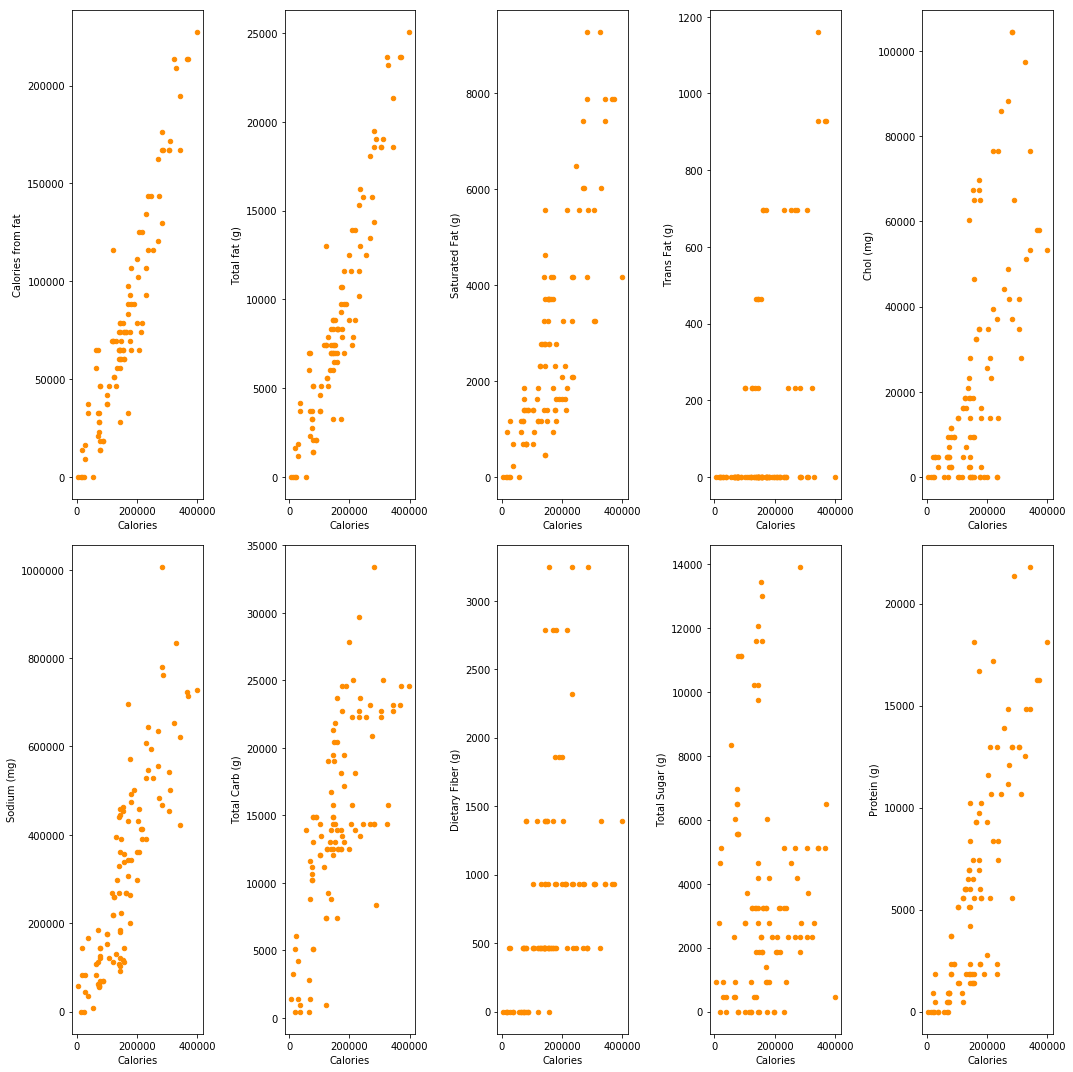

In [71]:
fig, ax = plt.subplots(2,5,figsize=(15,15))
i = k = 0
while(i < 2):
    j=0
    while(j < 5):
        df.plot.scatter(ax = ax[i,j] ,x='Calories', y=df.columns[3+k],color='DarkOrange',s=20);
        j = j + 1
        k = k + 1
    i = i + 1
fig.tight_layout()

2.16 คํานวณค่าสหสัมพันธ์ (correlation) ระหว่าง Calories และสารอาหารอื่นๆ

In [92]:
i = 3
while(i < len(df.columns)):
    print('Correlation between Calories and ',df.columns[i],' : ',df['Calories'].corr(df[df.columns[i]]))
    i = i + 1

Correlation between Calories and  Calories from fat  :  0.941454692081
Correlation between Calories and  Total fat (g)  :  0.940358789071
Correlation between Calories and  Saturated Fat (g)  :  0.796684481572
Correlation between Calories and  Trans Fat (g)  :  0.466637398034
Correlation between Calories and  Chol (mg)  :  0.674749130363
Correlation between Calories and  Sodium (mg)  :  0.853796150962
Correlation between Calories and  Total Carb (g)  :  0.703384829775
Correlation between Calories and  Dietary Fiber (g)  :  0.389786126206
Correlation between Calories and  Total Sugar (g)  :  0.0165594223473
Correlation between Calories and  Protein (g)  :  0.80570411357
